In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

In [2]:
pd.set_option('future.no_silent_downcasting', True)
PALETTE = sns.color_palette('flare_r', as_cmap=True)

In [4]:
# Root directory for an experiment
ROOT = os.path.join(os.getcwd(), 'temperature_experiments')
# Available datasets
datasets = ['MNIST', 'FMNIST', 'CIFAR10', 'PATHMNIST']
# Number of clients
no_of_clients = ['15', '30']
# Types of splits in terms of overlap
split_types = ['nonoverlaping', 'overlaping']
# Types of splits in terms of balance
split_balance = ['balanced', 'imbalanced']

# Section: Notebook Setup

In [5]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


In [ ]:
registered_temperature = {}
for dataset in datasets:
    for type in split_types:
        for balance in split_balance:
            for no in no_of_clients:
                path = os.path.join(ROOT, dataset, type, balance, no)
                dir_name = f"{dataset}_{type}_{balance}_{no}"
                registered_temperature[dir_name] = pd.read_csv(os.path.join(ROOT, dataset, type, balance, no, \
                    dir_name, 'results', 'clusters_temperature.csv'), names=['temperature'], index_col=0)

In [7]:
GENERAL_RATIO = set_size(width='thesis', fraction=3.0)
SPECIAL_RATIO = set_size(width='thesis', fraction=5.0)

Y_LABEL_FONT = 13
X_LABEL_FONT = 13
TITLE_FONT = 15
ANOT_FONT = 10

#

# Section 1: Individual Analysis

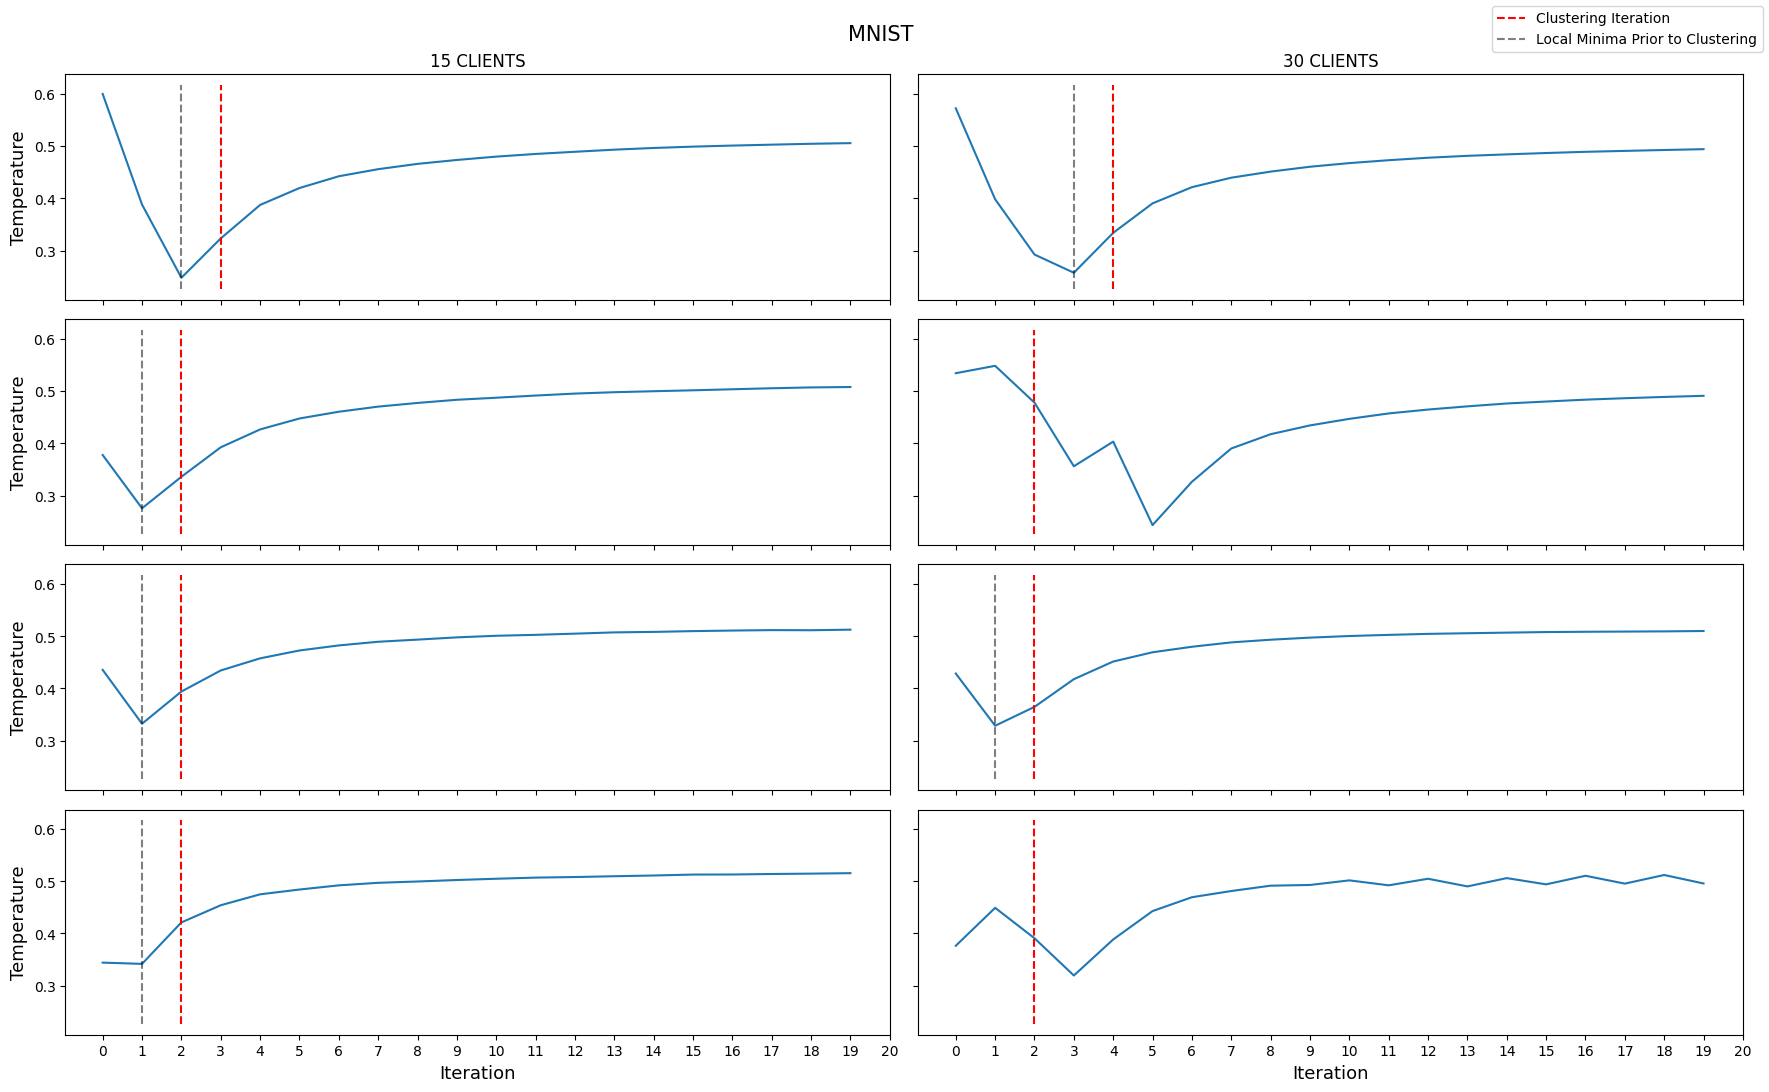

In [12]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO, sharey=True, sharex=True)
round_cutoff = 20

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['MNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['MNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['MNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['MNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[0][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[0][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=3, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[1][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
axes[3][1].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
for a in range(4):
    axes[a][0].set_ylabel('Temperature', fontsize=Y_LABEL_FONT)
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("MNIST", fontsize=TITLE_FONT)
fig.legend(fontsize=ANOT_FONT)
fig.tight_layout()

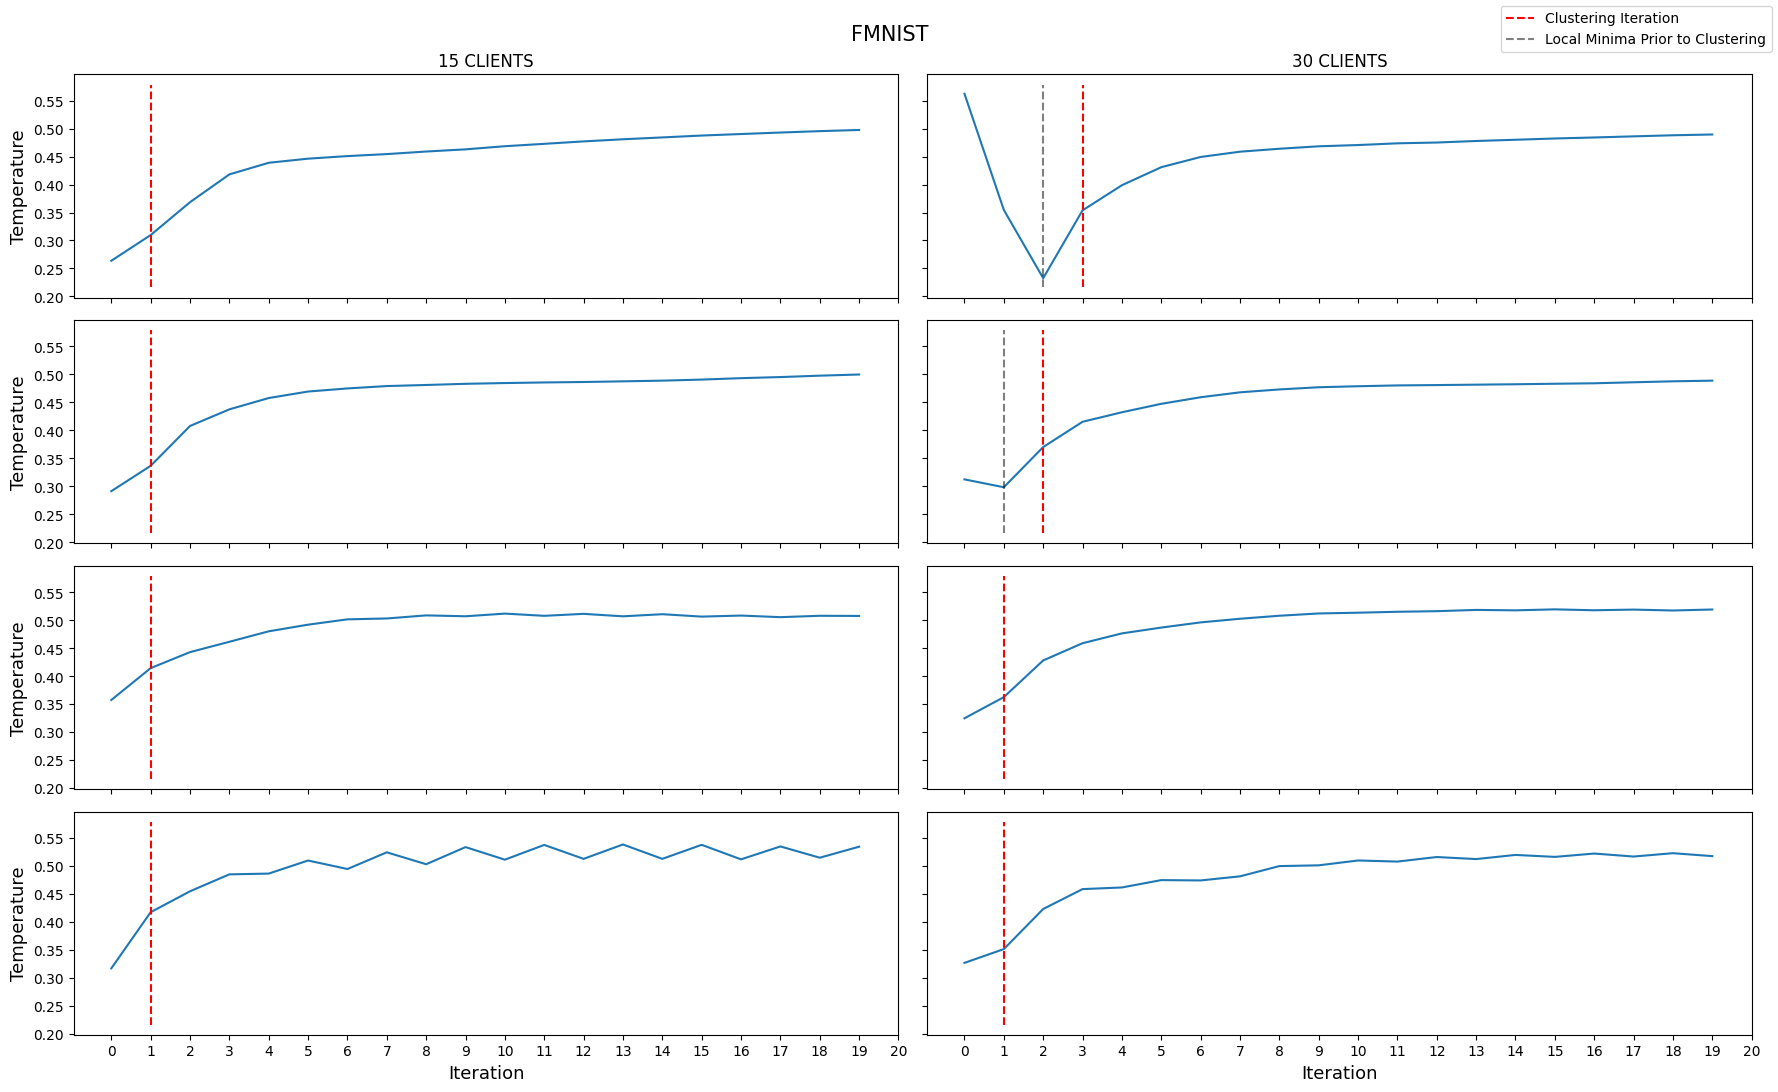

In [14]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO, sharey=True, sharex=True)
round_cutoff = 20

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['FMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['FMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['FMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['FMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[0][1].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
axes[3][1].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
for a in range(4):
    axes[a][0].set_ylabel('Temperature', fontsize=Y_LABEL_FONT)
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("FMNIST", fontsize=TITLE_FONT)
fig.legend(fontsize=ANOT_FONT)
fig.tight_layout()

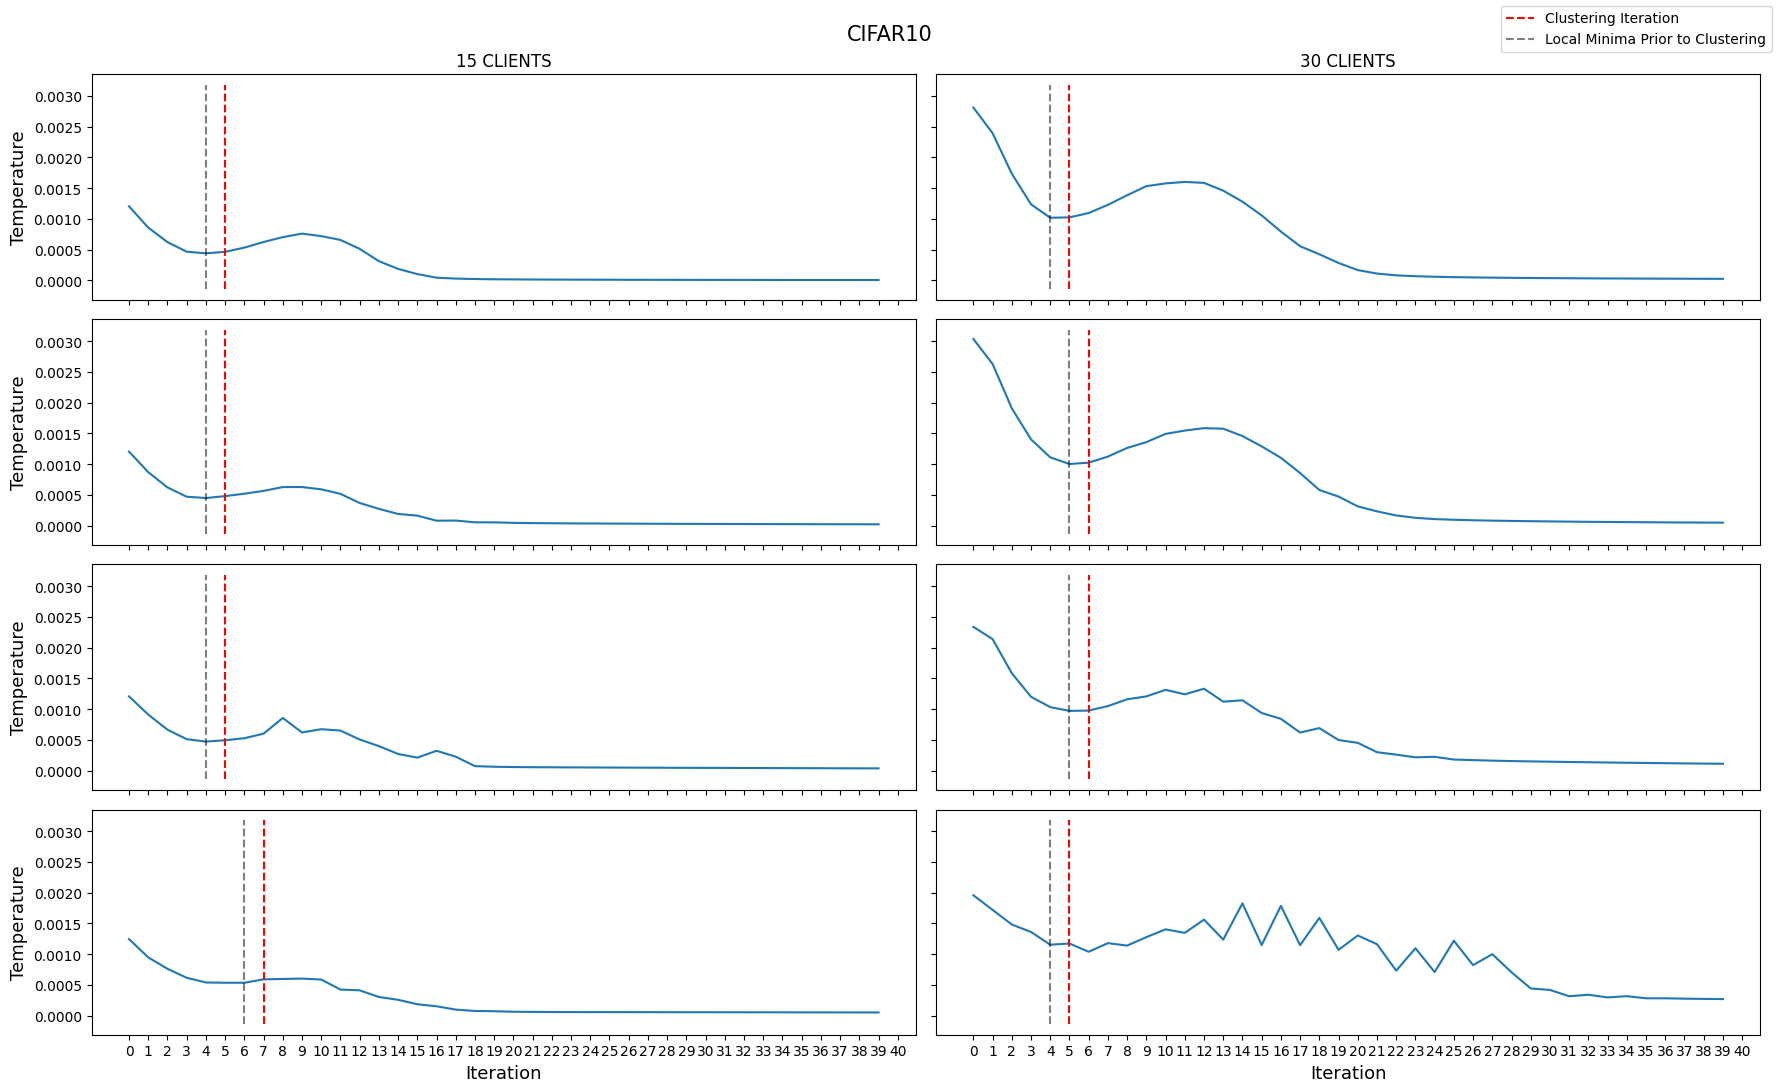

In [15]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO, sharey=True, sharex=True)
round_cutoff = 40

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['CIFAR10_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['CIFAR10_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['CIFAR10_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['CIFAR10_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[0][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][0].vlines(x=7, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=6, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[0][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[1][1].vlines(x=6, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][1].vlines(x=6, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[3][0].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
axes[3][1].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
for a in range(4):
    axes[a][0].set_ylabel('Temperature', fontsize=Y_LABEL_FONT)
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("CIFAR10", fontsize=TITLE_FONT)
fig.legend(fontsize=ANOT_FONT)
fig.tight_layout()

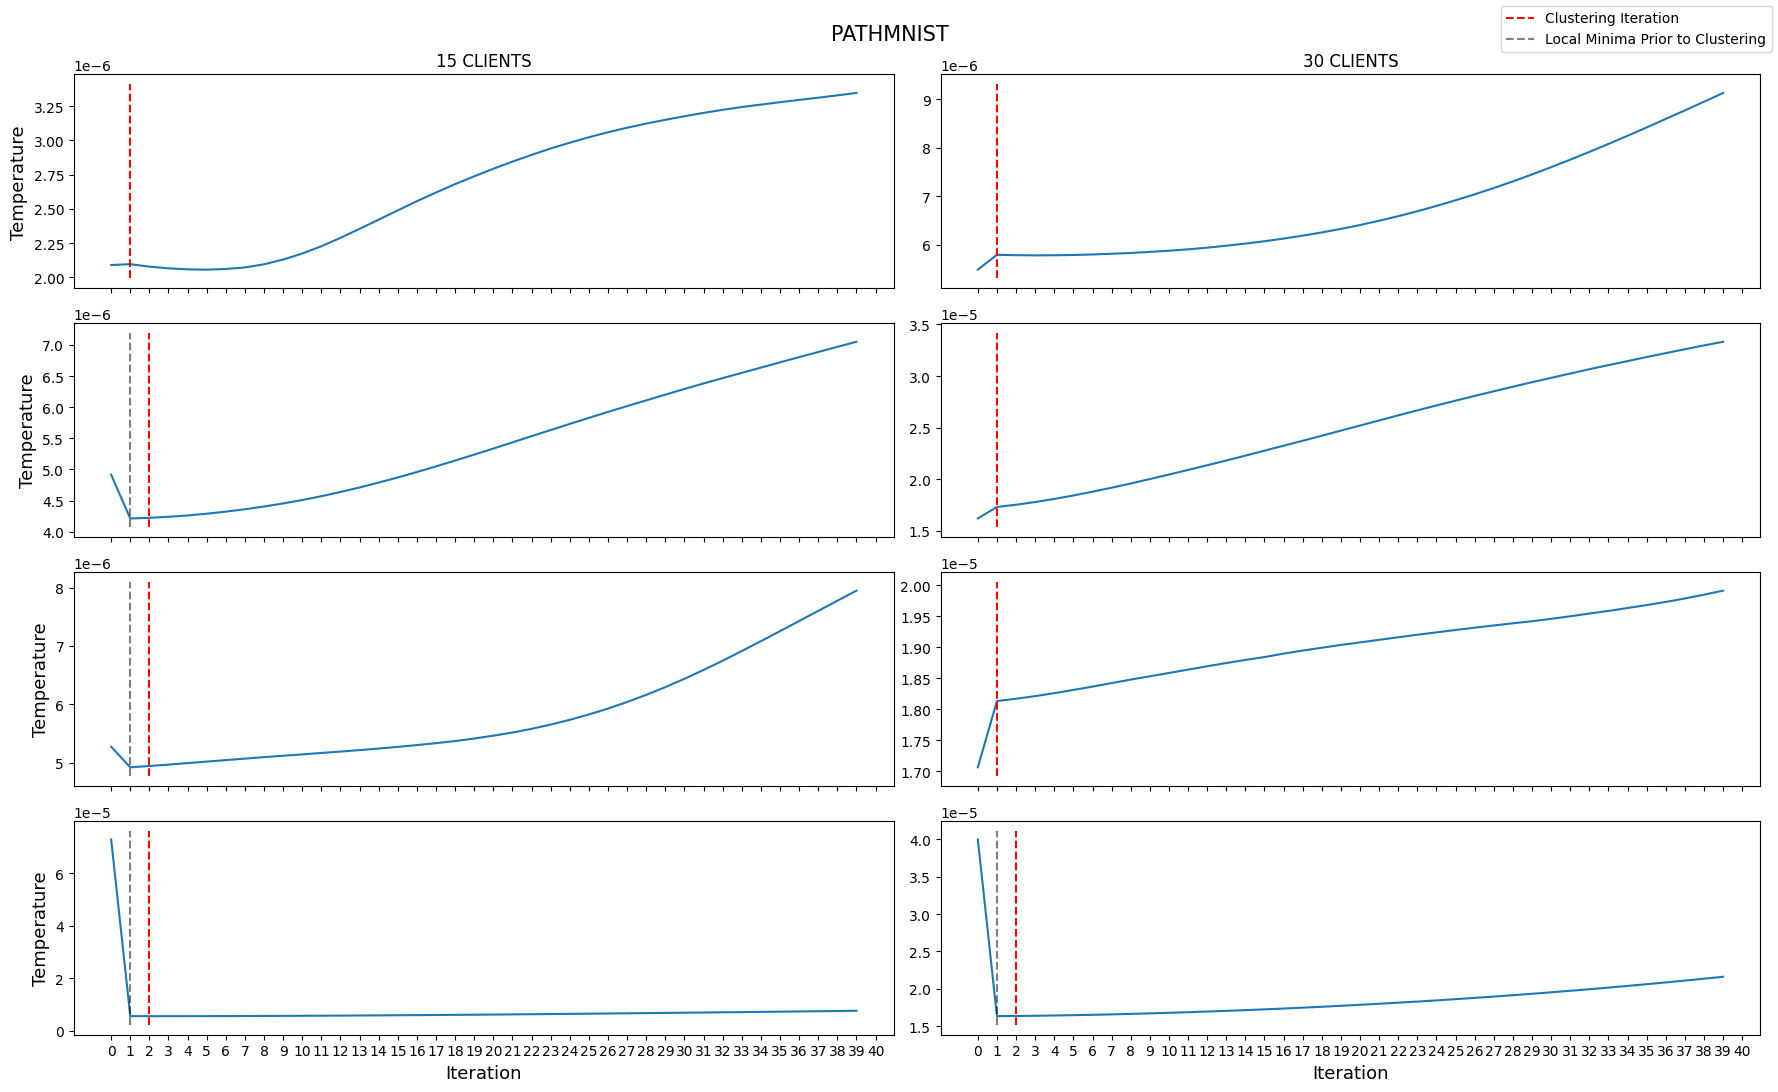

In [16]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO, sharey=False, sharex=True)
round_cutoff = 40

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['PATHMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['PATHMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['PATHMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['PATHMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['PATHMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['PATHMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['PATHMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['PATHMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = axes[0][0].get_ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')

ymin, ymax = axes[1][0].get_ylim()
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')

ymin, ymax = axes[2][0].get_ylim()
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[3][0].get_ylim()
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[0][1].get_ylim()
axes[0][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[1][1].get_ylim()
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[2][1].get_ylim()
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[3][1].get_ylim()
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[3][0].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
axes[3][1].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
for a in range(4):
    axes[a][0].set_ylabel('Temperature', fontsize=Y_LABEL_FONT)
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("PATHMNIST", fontsize=TITLE_FONT)
fig.legend(fontsize=ANOT_FONT)
fig.tight_layout()

## Section 2: Averaged Across Runs

### Section 2.1: Averaged per Dataset

In [17]:
# Stacking frames
frames = [registered_temperature['MNIST_overlaping_balanced_15'], 
          registered_temperature['MNIST_overlaping_imbalanced_15'], 
          registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature']]
mnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['MNIST_overlaping_balanced_30'], 
          registered_temperature['MNIST_overlaping_imbalanced_30'], 
          registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature']]
mnist_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['FMNIST_overlaping_balanced_15'], 
          registered_temperature['FMNIST_overlaping_imbalanced_15'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature']]
fmnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['FMNIST_overlaping_balanced_30'], 
          registered_temperature['FMNIST_overlaping_imbalanced_30'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature']]
fmnist_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['CIFAR10_overlaping_balanced_15'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_15'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature']]
cifar10_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['CIFAR10_overlaping_balanced_30'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_30'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature']]
cifar10_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['PATHMNIST_overlaping_balanced_15'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_15'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_15']['temperature']]
pathmnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['PATHMNIST_overlaping_balanced_30'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_30'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_30']['temperature']]
pathmnist_30_stacked = pd.concat(frames, axis=1)

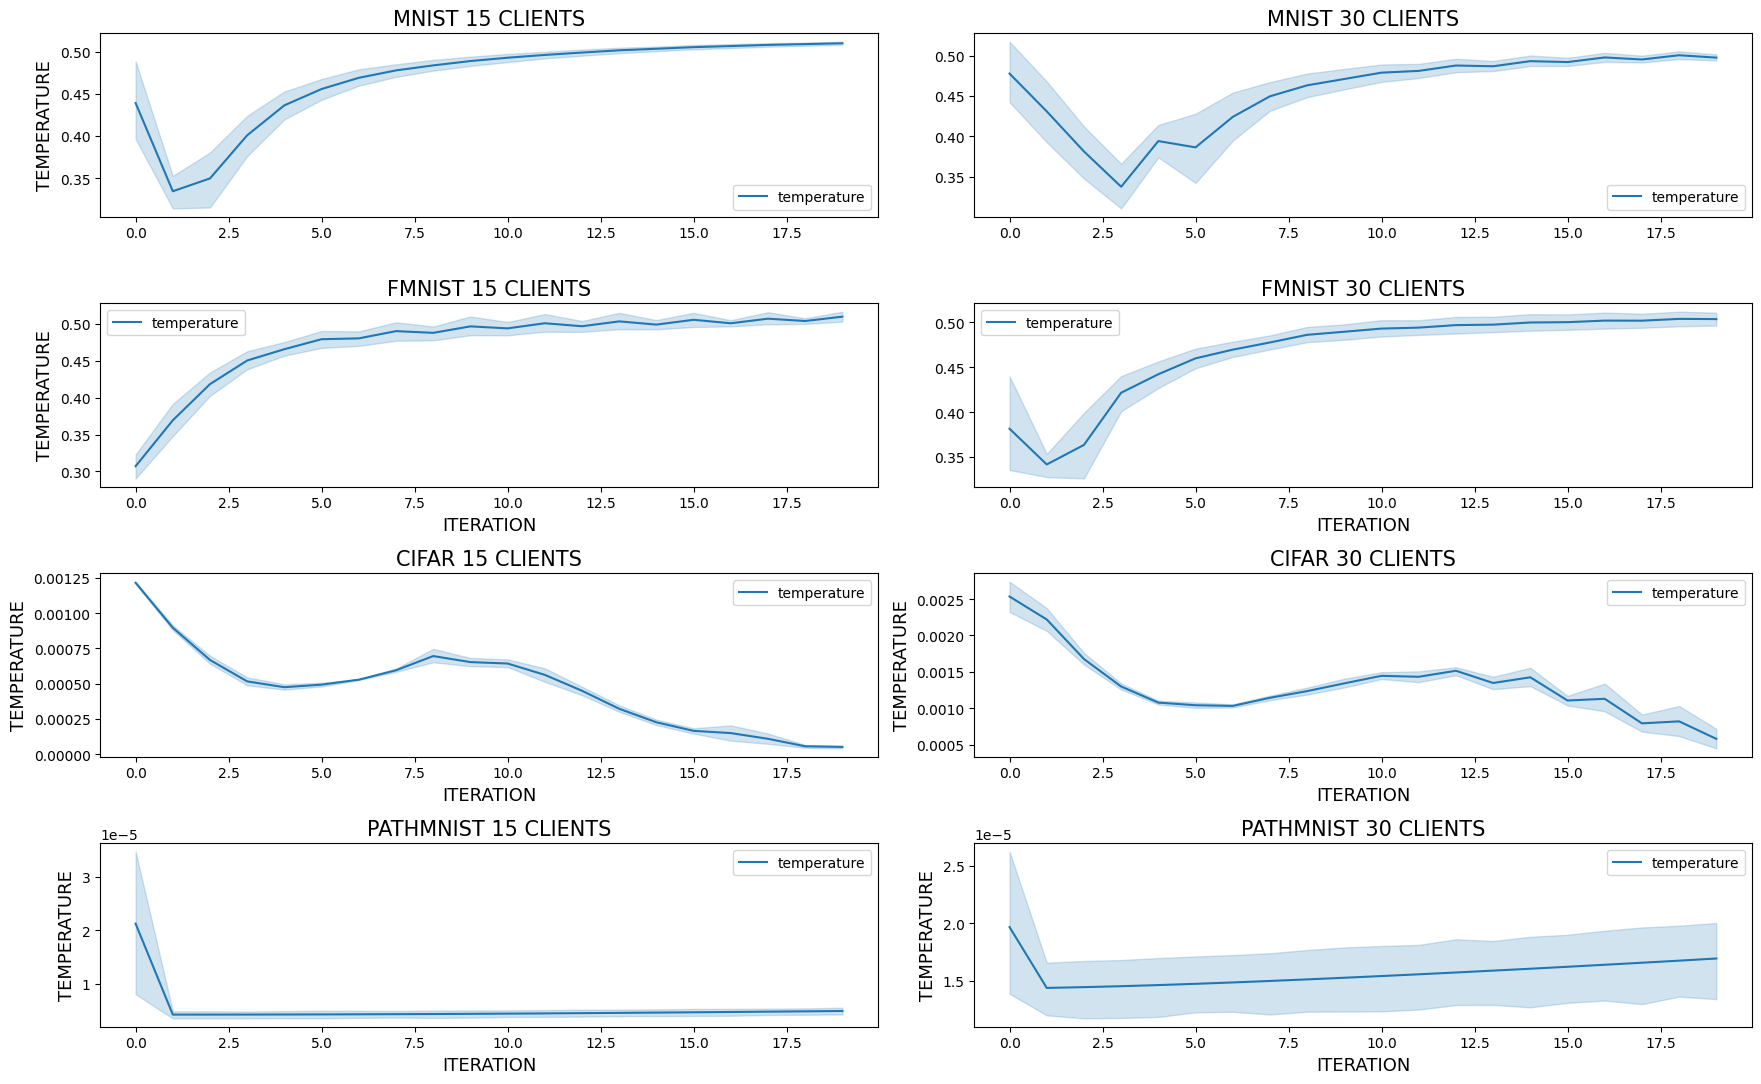

In [20]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO)

# Mnist 15 stakced
sns.lineplot(mnist_15_stacked[:20], ax=axes[0][0])
axes[0][0].set_title('MNIST 15 CLIENTS', fontsize=TITLE_FONT)
axes[0][0].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)

# MNIST 30 stakced
sns.lineplot(mnist_30_stacked[:20], ax=axes[0][1])
axes[0][1].set_title("MNIST 30 CLIENTS", fontsize=TITLE_FONT)

# FMNIST 15 stacked
sns.lineplot(fmnist_15_stacked[:20], ax=axes[1][0])
axes[1][0].set_title("FMNIST 15 CLIENTS", fontsize=TITLE_FONT)
axes[1][0].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[1][0].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# FNIST 30 stacked
sns.lineplot(fmnist_30_stacked[:20], ax=axes[1][1])
axes[1][1].set_title("FMNIST 30 CLIENTS", fontsize=TITLE_FONT)
axes[1][1].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# CIFAR 15 stacked
sns.lineplot(cifar10_15_stacked[:20], ax=axes[2][0])
axes[2][0].set_title("CIFAR 15 CLIENTS", fontsize=TITLE_FONT)
axes[2][0].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[2][0].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# CIFAR 30 stacked
sns.lineplot(cifar10_30_stacked[:20], ax=axes[2][1])
axes[2][1].set_title("CIFAR 30 CLIENTS", fontsize=TITLE_FONT)
axes[2][1].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[2][1].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# PATHMNIST 15 stacked
sns.lineplot(pathmnist_15_stacked[:20], ax=axes[3][0])
axes[3][0].set_title("PATHMNIST 15 CLIENTS", fontsize=TITLE_FONT)
axes[3][0].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[3][0].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# PATHMNIST 30 stacked
sns.lineplot(pathmnist_30_stacked[:20], ax=axes[3][1])
axes[3][1].set_title("PATHMNIST 30 CLIENTS", fontsize=TITLE_FONT)
axes[3][1].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[3][1].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

plt.tight_layout()

### Section 2.2: Averages across all datasets.

In [21]:
# Stacking frames
frames = [registered_temperature['MNIST_overlaping_balanced_15'], 
          registered_temperature['MNIST_overlaping_imbalanced_15'], 
          registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['FMNIST_overlaping_balanced_15'], 
          registered_temperature['FMNIST_overlaping_imbalanced_15'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['CIFAR10_overlaping_balanced_15'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_15'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['PATHMNIST_overlaping_balanced_15'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_15'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_15']['temperature']]
temperature_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['MNIST_overlaping_balanced_30'], 
          registered_temperature['MNIST_overlaping_imbalanced_30'], 
          registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['FMNIST_overlaping_balanced_30'], 
          registered_temperature['FMNIST_overlaping_imbalanced_30'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['CIFAR10_overlaping_balanced_30'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_30'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['PATHMNIST_overlaping_balanced_30'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_30'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_30']['temperature']]
temperature_30_stacked = pd.concat(frames, axis=1)

<Axes: >

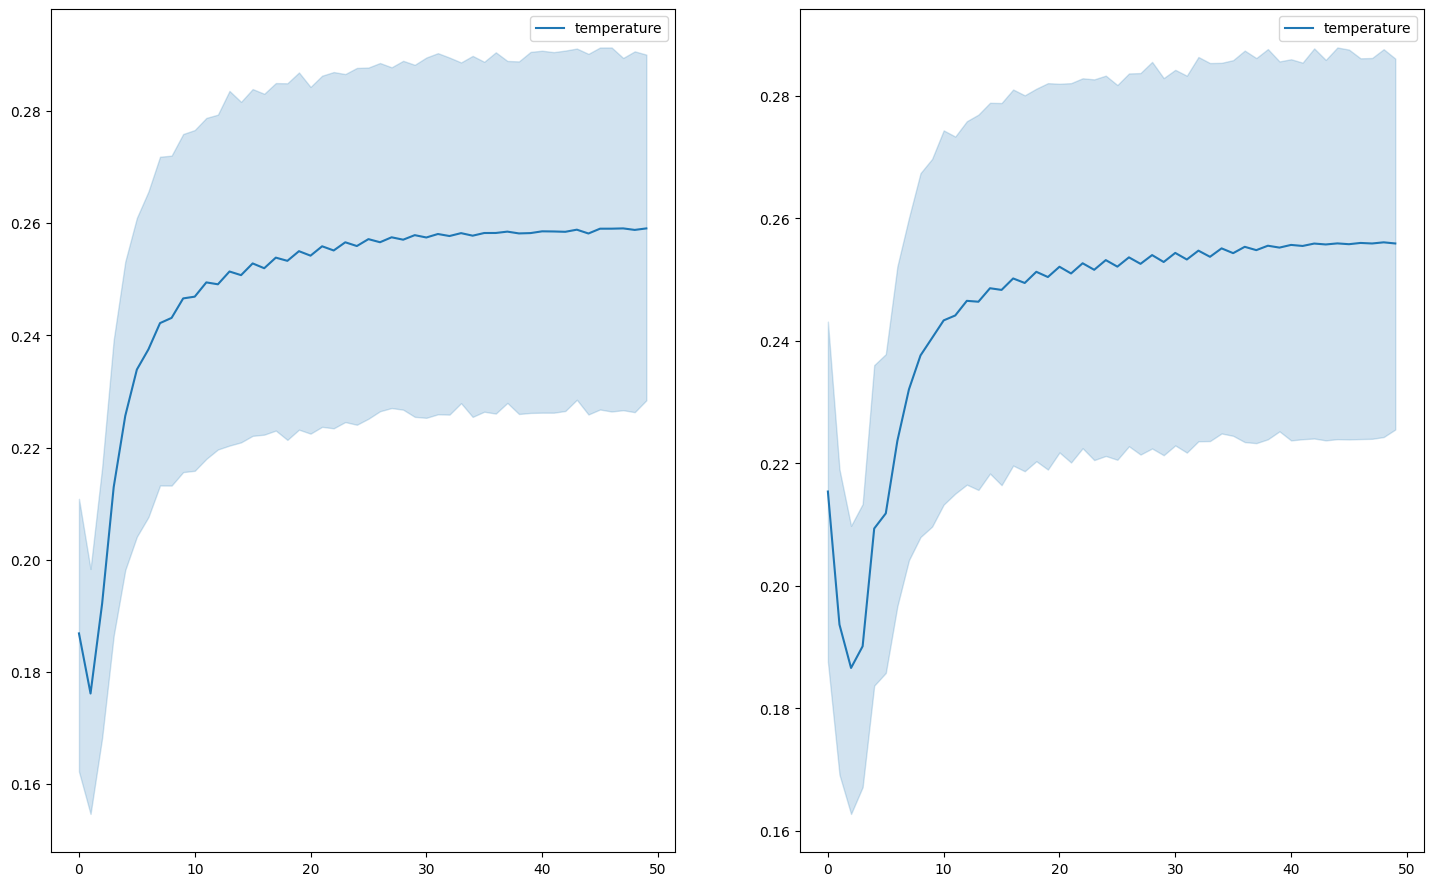

In [23]:
fig, axes = plt.subplots(1, 2, figsize=GENERAL_RATIO)

sns.lineplot(temperature_15_stacked, ax=axes[0], n_boot=5000, err_style='band')
sns.lineplot(temperature_30_stacked, ax=axes[1], n_boot=5000, err_style='band')

<Axes: >

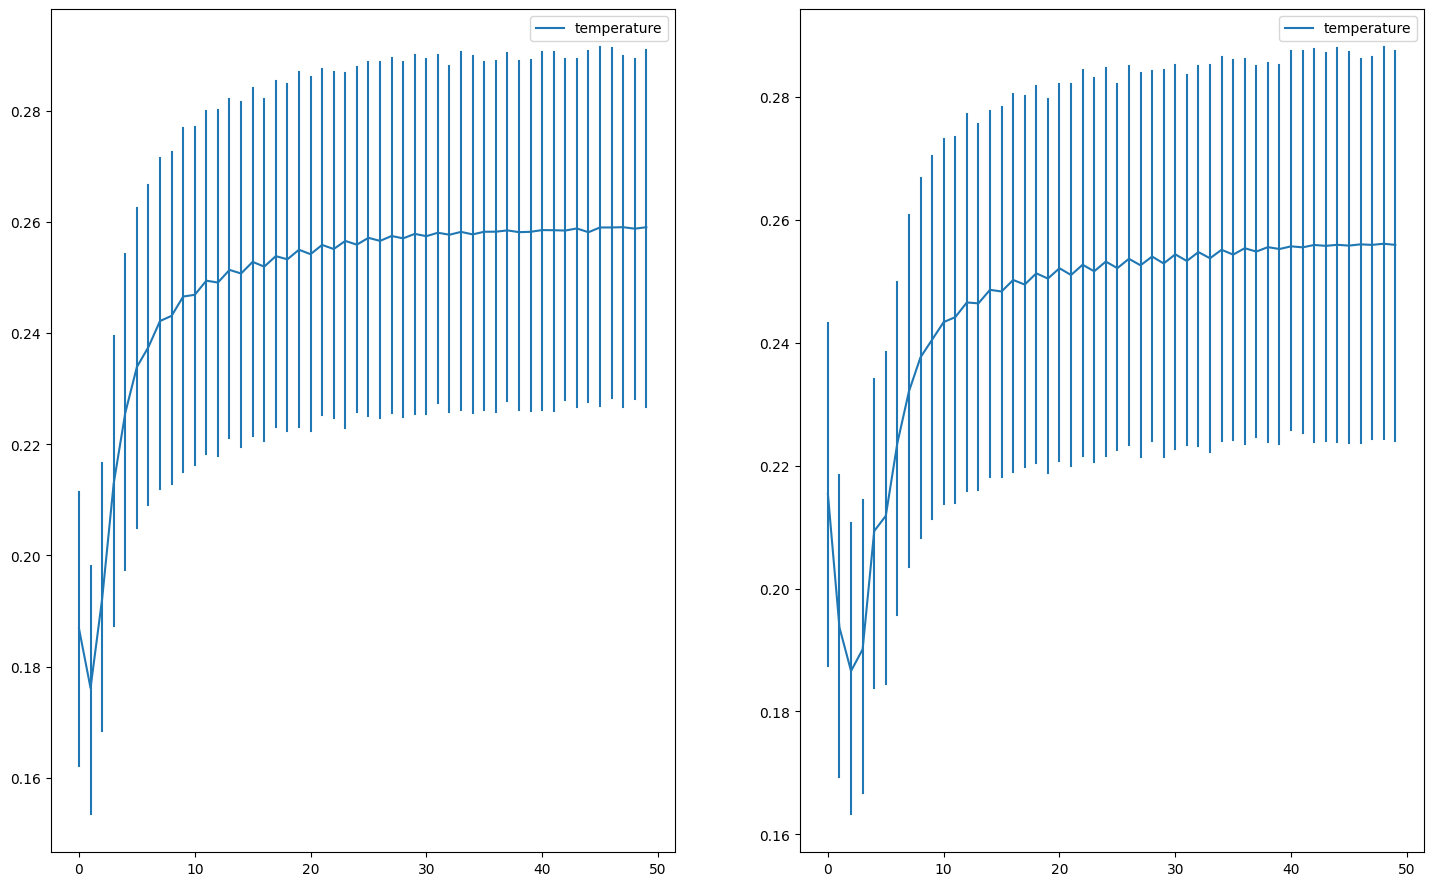

In [27]:
fig, axes = plt.subplots(1, 2, figsize=GENERAL_RATIO)

sns.lineplot(temperature_15_stacked, ax=axes[0], n_boot=5000, err_style='bars')
sns.lineplot(temperature_30_stacked, ax=axes[1], n_boot=5000, err_style='bars')

<!-- ## Stage 3: Distinction Between FullSized ResNet and Adjusted ResNet -->

In [34]:
scenarios = ['overlaping_balanced', 'overlaping_imbalanced', 'nonoverlaping_balanced', 'nonoverlaping_imbalanced']

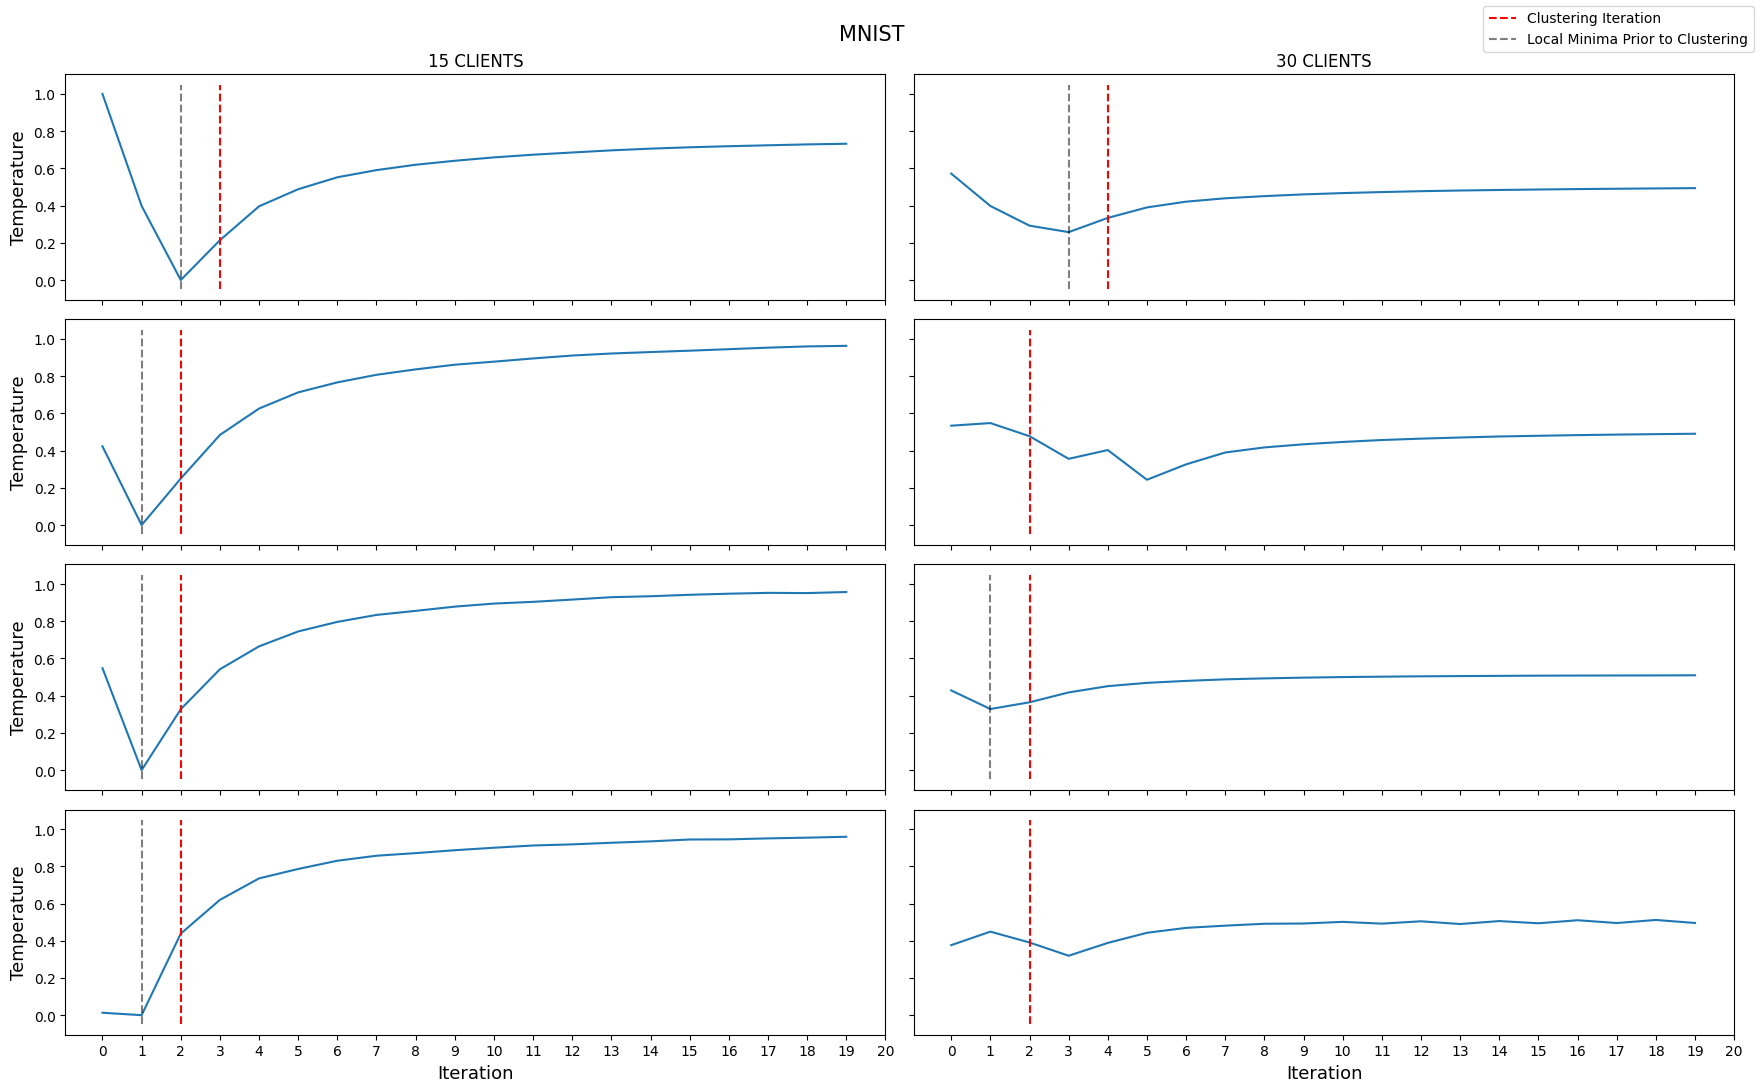

In [37]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO, sharey=True, sharex=True)
round_cutoff = 20

for scenario in scenarios:
    registered_temperature[f'MNIST_{scenario}_15'] = (registered_temperature[f'MNIST_{scenario}_15'] - registered_temperature[f'MNIST_{scenario}_15'] .min()) / (registered_temperature[f'MNIST_{scenario}_15'].max() - registered_temperature[f'MNIST_{scenario}_15'] .min())

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['MNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['MNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['MNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['MNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[0][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[0][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=3, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[1][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
axes[3][1].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
for a in range(4):
    axes[a][0].set_ylabel('Temperature', fontsize=Y_LABEL_FONT)
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("MNIST", fontsize=TITLE_FONT)
fig.legend(fontsize=ANOT_FONT)
fig.tight_layout()

## Seciton 3: Averaged Across Runs (Normalized)

### Section 3.1: Averaged per Dataset

In [25]:
mnist_15_stacked_normalized = (mnist_15_stacked - mnist_15_stacked.min()) / (mnist_15_stacked.max() - mnist_15_stacked.min())
mnist_30_stacked_normalized = (mnist_30_stacked - mnist_30_stacked.min()) / (mnist_30_stacked.max() - mnist_30_stacked.min())
fmnist_15_stacked_normalized = (fmnist_15_stacked - fmnist_15_stacked.min()) / (fmnist_15_stacked.max() - fmnist_15_stacked.min())
fmnist_30_stacked_normalized = (fmnist_30_stacked - fmnist_30_stacked.min()) / (fmnist_30_stacked.max() - fmnist_30_stacked.min())
cifar10_15_stacked_normalized = (cifar10_15_stacked - cifar10_15_stacked.min()) / (cifar10_15_stacked.max() - cifar10_15_stacked.min())
cifar10_30_stacked_normalized = (cifar10_30_stacked - cifar10_30_stacked.min()) / (cifar10_30_stacked.max() - cifar10_30_stacked.min())
pathmnist_15_stacked_normalized = (pathmnist_15_stacked - pathmnist_15_stacked.min()) / (pathmnist_15_stacked.max() - pathmnist_15_stacked.min())
pathmnist_30_stacked_normalized = (pathmnist_30_stacked - pathmnist_30_stacked.min()) / (pathmnist_30_stacked.max() - pathmnist_30_stacked.min())

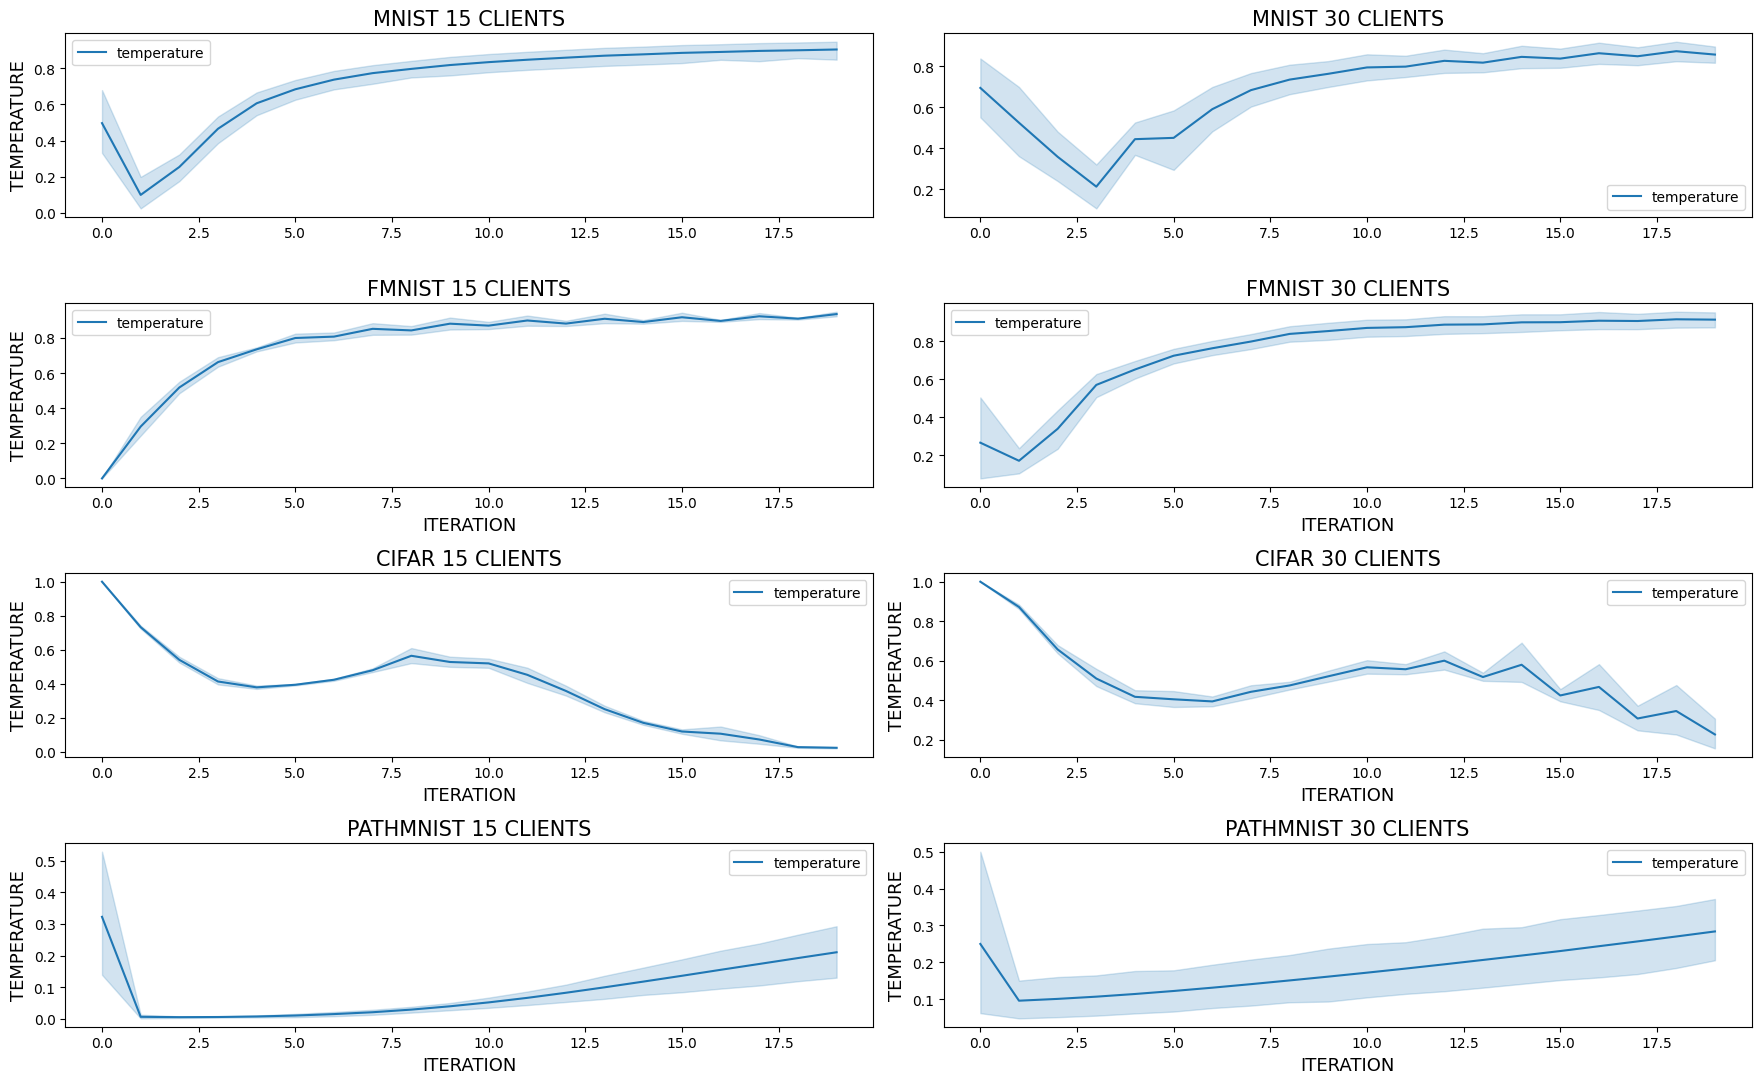

In [28]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO)

# Mnist 15 stakced
sns.lineplot(mnist_15_stacked_normalized[:20], ax=axes[0][0])
axes[0][0].set_title('MNIST 15 CLIENTS', fontsize=TITLE_FONT)
axes[0][0].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)

# MNIST 30 stakced
sns.lineplot(mnist_30_stacked_normalized[:20], ax=axes[0][1])
axes[0][1].set_title("MNIST 30 CLIENTS", fontsize=TITLE_FONT)

# FMNIST 15 stacked
sns.lineplot(fmnist_15_stacked_normalized[:20], ax=axes[1][0])
axes[1][0].set_title("FMNIST 15 CLIENTS", fontsize=TITLE_FONT)
axes[1][0].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[1][0].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# FNIST 30 stacked
sns.lineplot(fmnist_30_stacked_normalized[:20], ax=axes[1][1])
axes[1][1].set_title("FMNIST 30 CLIENTS", fontsize=TITLE_FONT)
axes[1][1].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# CIFAR 15 stacked
sns.lineplot(cifar10_15_stacked_normalized[:20], ax=axes[2][0])
axes[2][0].set_title("CIFAR 15 CLIENTS", fontsize=TITLE_FONT)
axes[2][0].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[2][0].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# CIFAR 30 stacked
sns.lineplot(cifar10_30_stacked_normalized[:20], ax=axes[2][1])
axes[2][1].set_title("CIFAR 30 CLIENTS", fontsize=TITLE_FONT)
axes[2][1].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[2][1].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# PATHMNIST 15 stacked
sns.lineplot(pathmnist_15_stacked_normalized[:20], ax=axes[3][0])
axes[3][0].set_title("PATHMNIST 15 CLIENTS", fontsize=TITLE_FONT)
axes[3][0].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[3][0].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

# PATHMNIST 30 stacked
sns.lineplot(pathmnist_30_stacked_normalized[:20], ax=axes[3][1])
axes[3][1].set_title("PATHMNIST 30 CLIENTS", fontsize=TITLE_FONT)
axes[3][1].set_ylabel("TEMPERATURE", fontsize=Y_LABEL_FONT)
axes[3][1].set_xlabel("ITERATION", fontsize=X_LABEL_FONT)

plt.tight_layout()

### Section 3.2: Averaged per all Datasets

In [31]:
# Stacking frames
frames = [registered_temperature['MNIST_overlaping_balanced_15'], 
          registered_temperature['MNIST_overlaping_imbalanced_15'], 
          registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['FMNIST_overlaping_balanced_15'], 
          registered_temperature['FMNIST_overlaping_imbalanced_15'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['CIFAR10_overlaping_balanced_15'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_15'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['PATHMNIST_overlaping_balanced_15'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_15'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_15']['temperature']]
temperature_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['MNIST_overlaping_balanced_30'], 
          registered_temperature['MNIST_overlaping_imbalanced_30'], 
          registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['FMNIST_overlaping_balanced_30'], 
          registered_temperature['FMNIST_overlaping_imbalanced_30'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['CIFAR10_overlaping_balanced_30'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_30'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['PATHMNIST_overlaping_balanced_30'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_30'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_30']['temperature']]
temperature_30_stacked = pd.concat(frames, axis=1)

temperature_15_stacked_normalized = (temperature_15_stacked - temperature_15_stacked.min()) / (temperature_15_stacked.max() - temperature_15_stacked.min())
temperature_30_stacked_normalized = (temperature_30_stacked - temperature_30_stacked.min()) / (temperature_30_stacked.max() - temperature_30_stacked.min())

<Axes: >

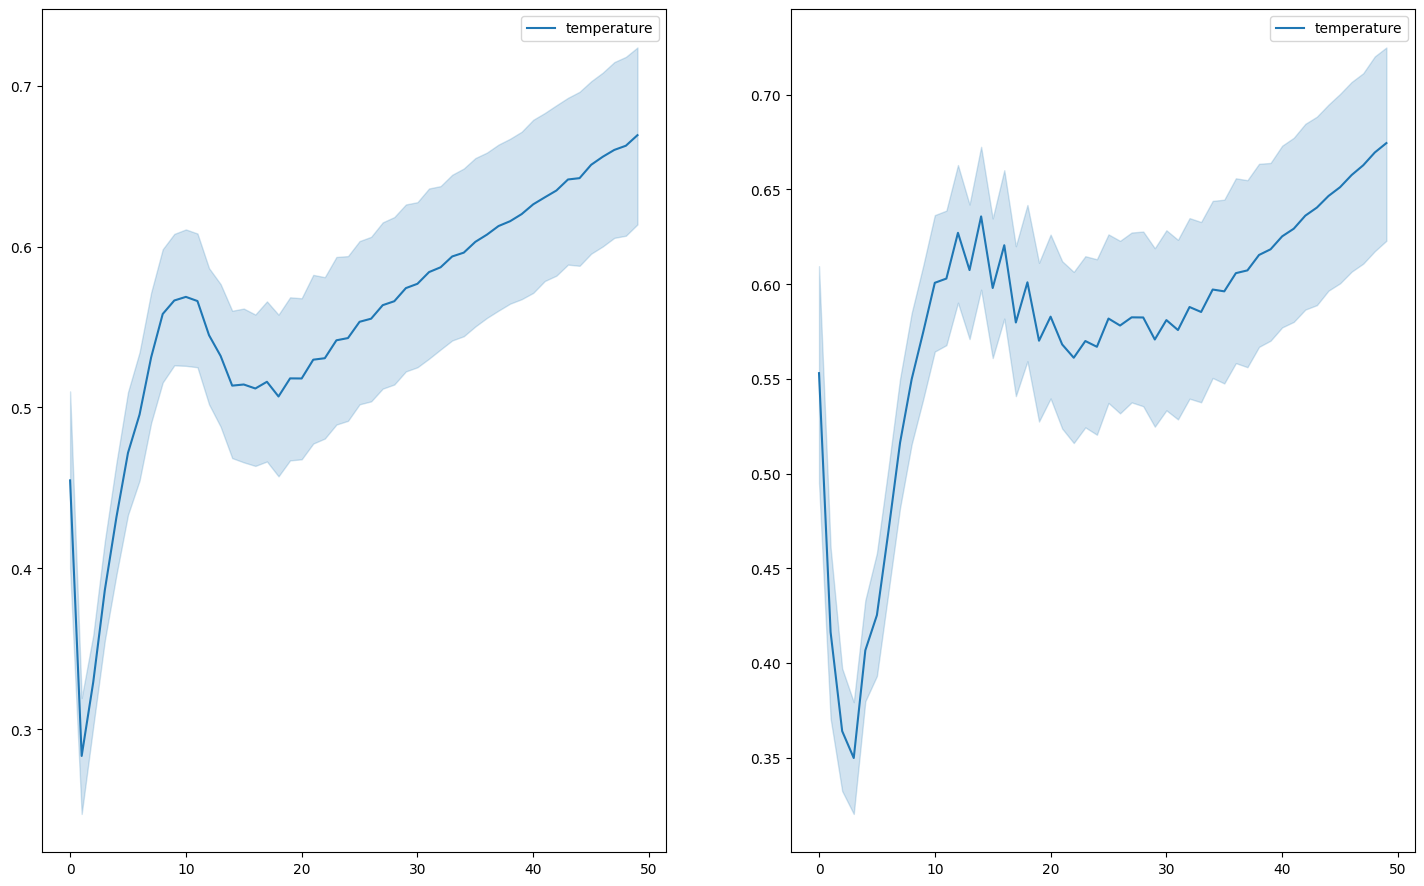

In [32]:
fig, axes = plt.subplots(1, 2, figsize=GENERAL_RATIO)

sns.lineplot(temperature_15_stacked_normalized, ax=axes[0], n_boot=5000, err_style='band')
sns.lineplot(temperature_30_stacked_normalized, ax=axes[1], n_boot=5000, err_style='band')

<Axes: >

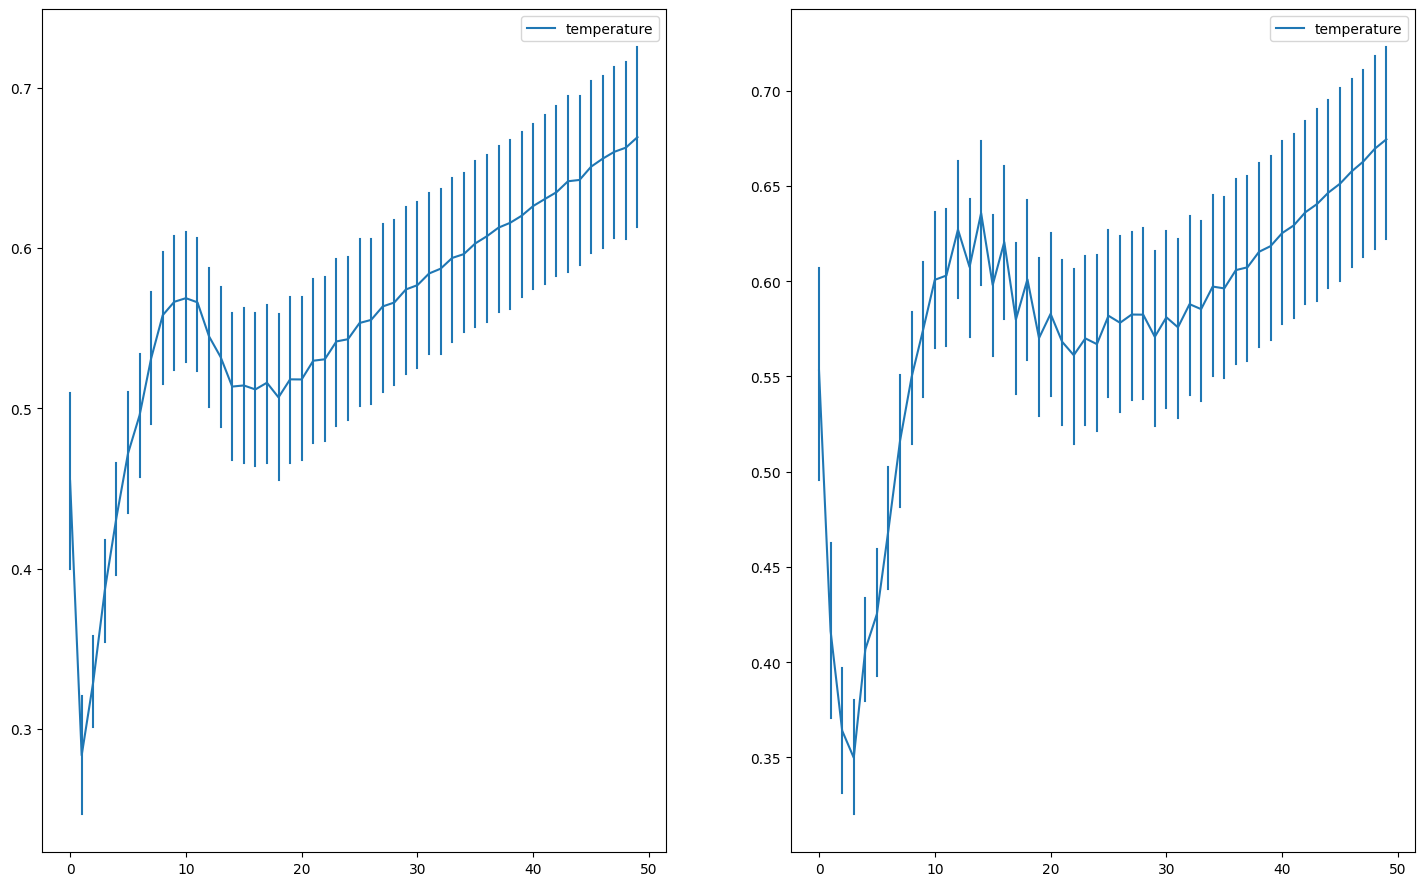

In [33]:
fig, axes = plt.subplots(1, 2, figsize=GENERAL_RATIO)

sns.lineplot(temperature_15_stacked_normalized, ax=axes[0], n_boot=5000, err_style='bars')
sns.lineplot(temperature_30_stacked_normalized, ax=axes[1], n_boot=5000, err_style='bars')

# Section 4: Individual Analysis (Normalized)

In [40]:
registered_temperature_normalized = {}
for dataset in datasets:
    for type in split_types:
        for balance in split_balance:
            for no in no_of_clients:
                path = os.path.join(ROOT, dataset, type, balance, no)
                dir_name = f"{dataset}_{type}_{balance}_{no}"
                registered_temperature_normalized[dir_name] = pd.read_csv(os.path.join(ROOT, dataset, type, balance, no, \
                    dir_name, 'results', 'clusters_temperature.csv'), names=['temperature'], index_col=0)
                registered_temperature_normalized[dir_name] = (registered_temperature_normalized[dir_name] - registered_temperature_normalized[dir_name].min()) / (registered_temperature_normalized[dir_name].max() - registered_temperature_normalized[dir_name].min())

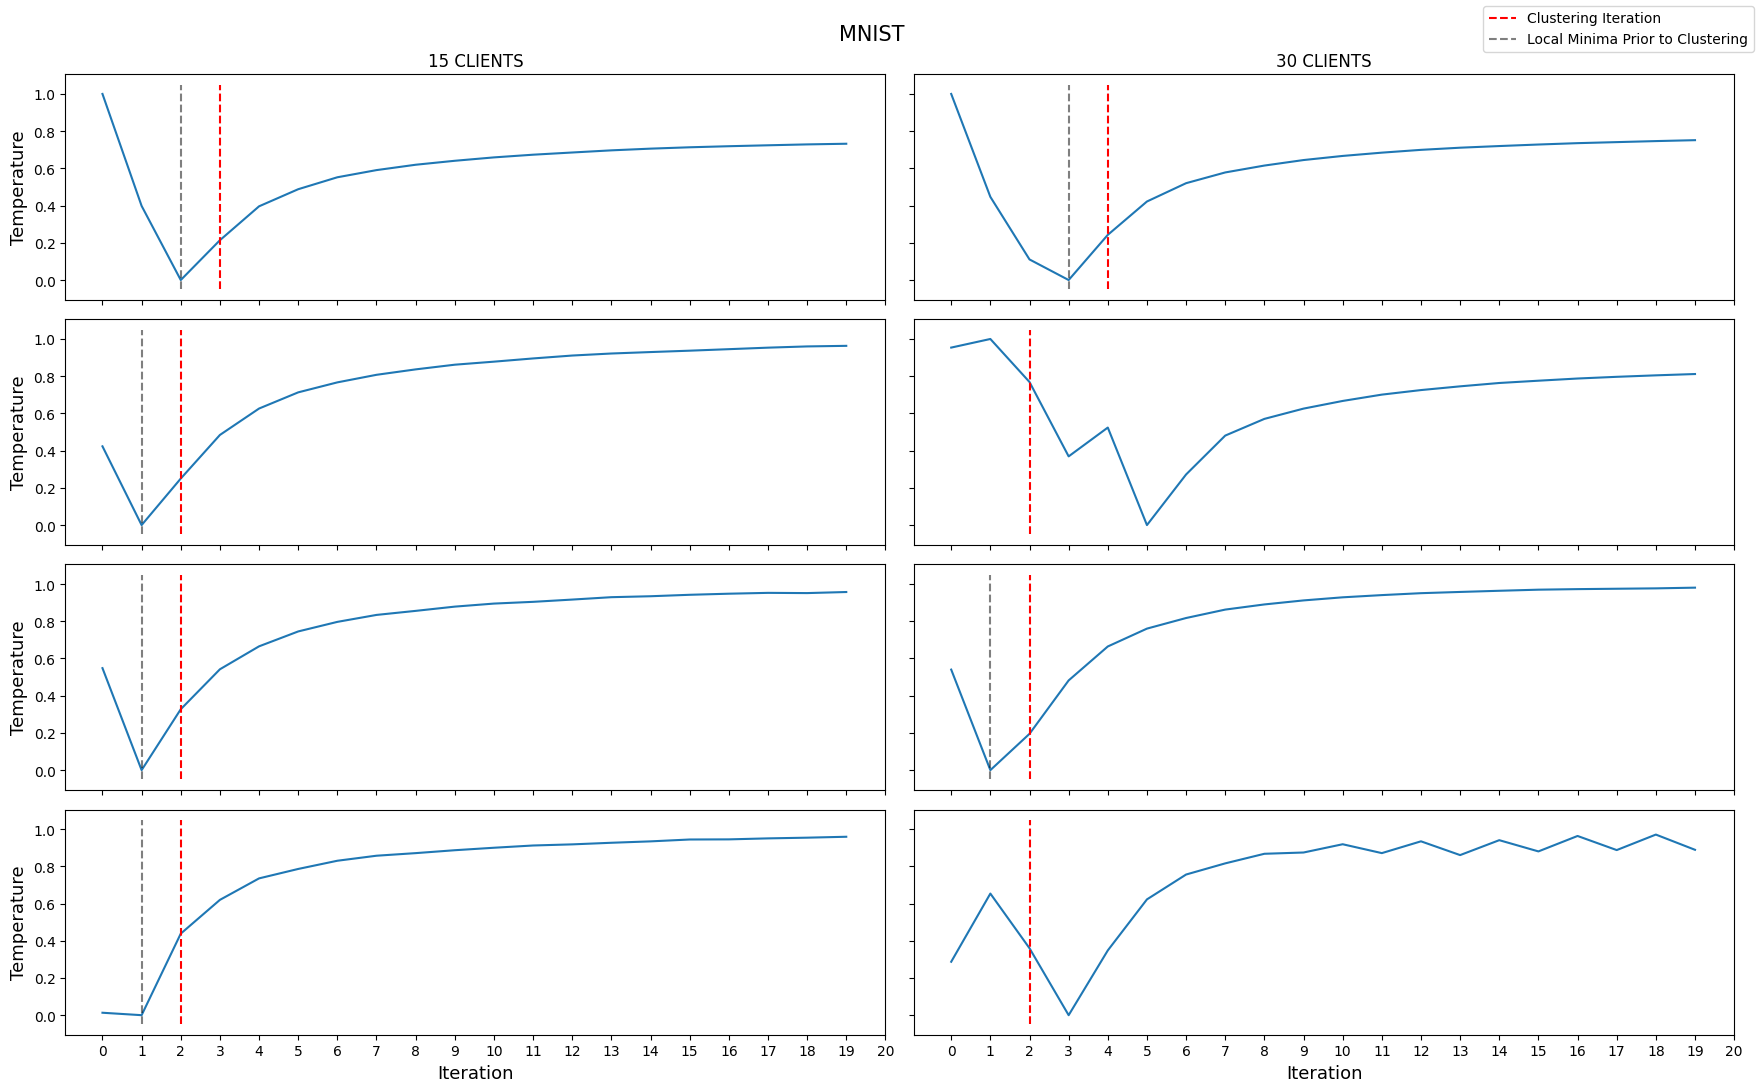

In [41]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO, sharey=True, sharex=True)
round_cutoff = 20

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature_normalized['MNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature_normalized['MNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature_normalized['MNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature_normalized['MNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature_normalized['MNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature_normalized['MNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature_normalized['MNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature_normalized['MNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[0][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[0][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=3, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[1][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
axes[3][1].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
for a in range(4):
    axes[a][0].set_ylabel('Temperature', fontsize=Y_LABEL_FONT)
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("MNIST", fontsize=TITLE_FONT)
fig.legend(fontsize=ANOT_FONT)
fig.tight_layout()

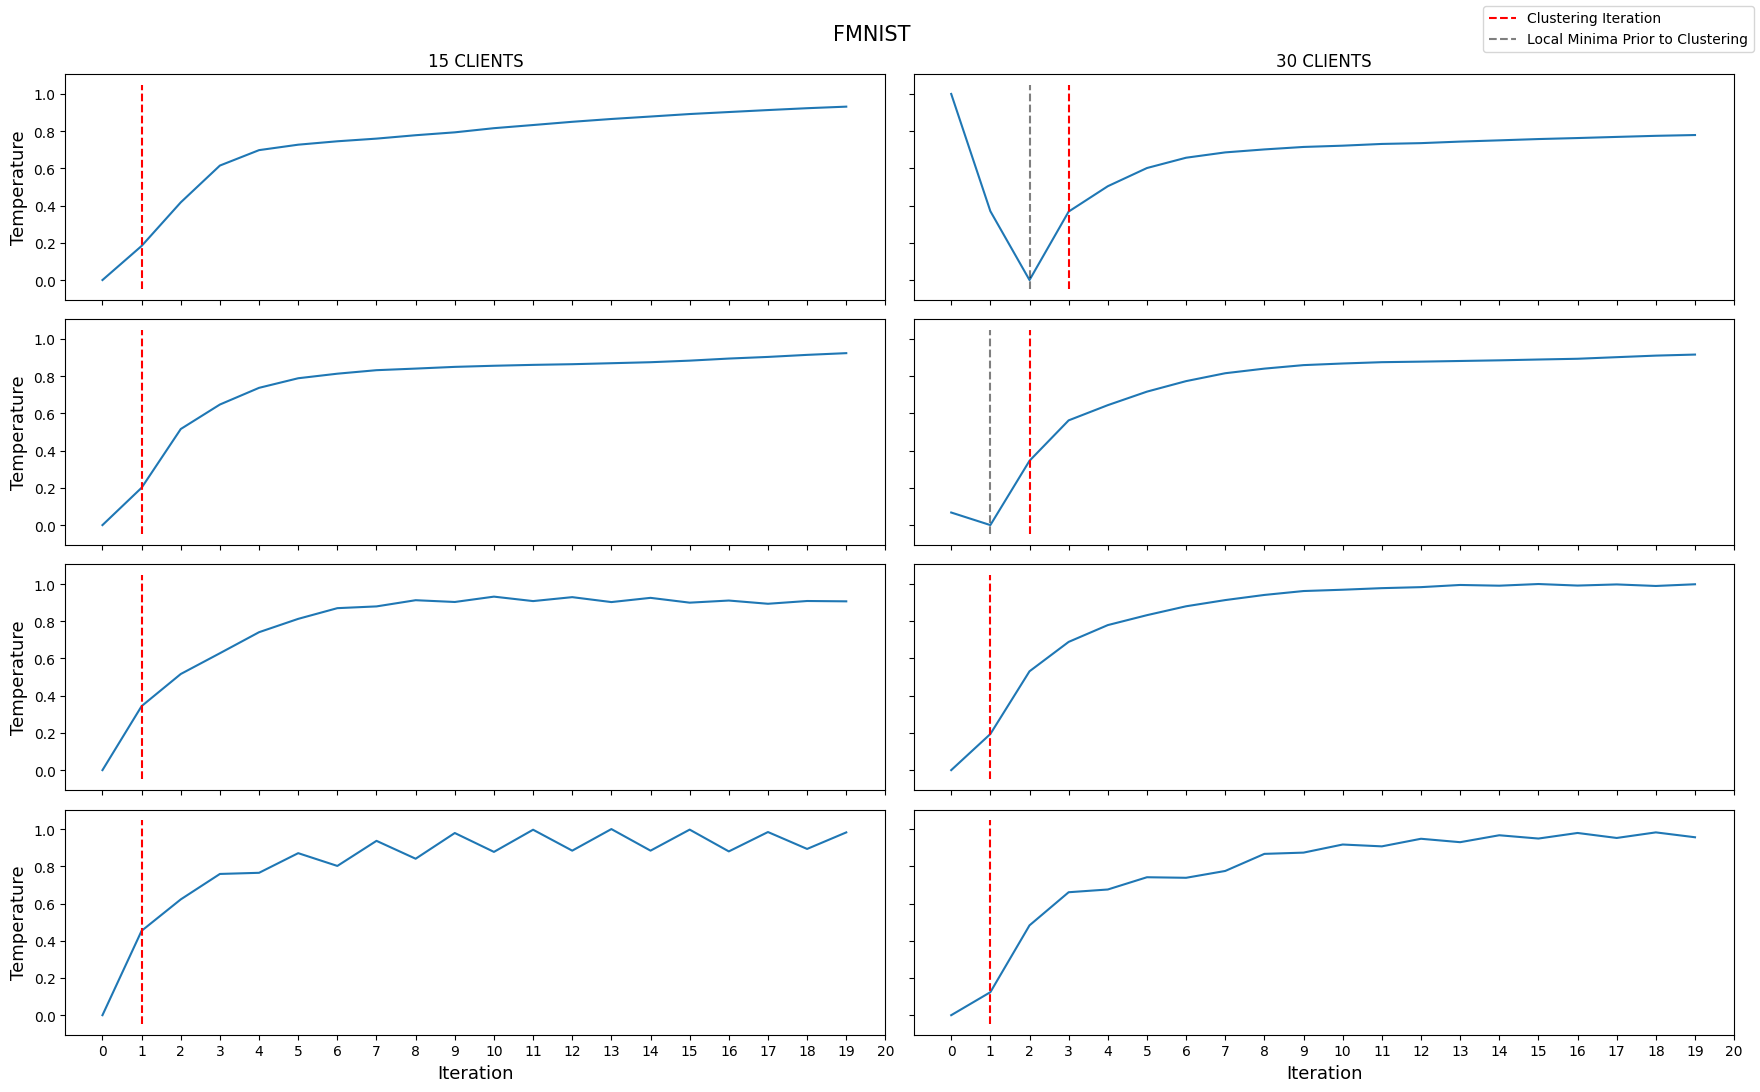

In [42]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO, sharey=True, sharex=True)
round_cutoff = 20

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature_normalized['FMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature_normalized['FMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature_normalized['FMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature_normalized['FMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature_normalized['FMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature_normalized['FMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature_normalized['FMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature_normalized['FMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[0][1].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
axes[3][1].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
for a in range(4):
    axes[a][0].set_ylabel('Temperature', fontsize=Y_LABEL_FONT)
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("FMNIST", fontsize=TITLE_FONT)
fig.legend(fontsize=ANOT_FONT)
fig.tight_layout()

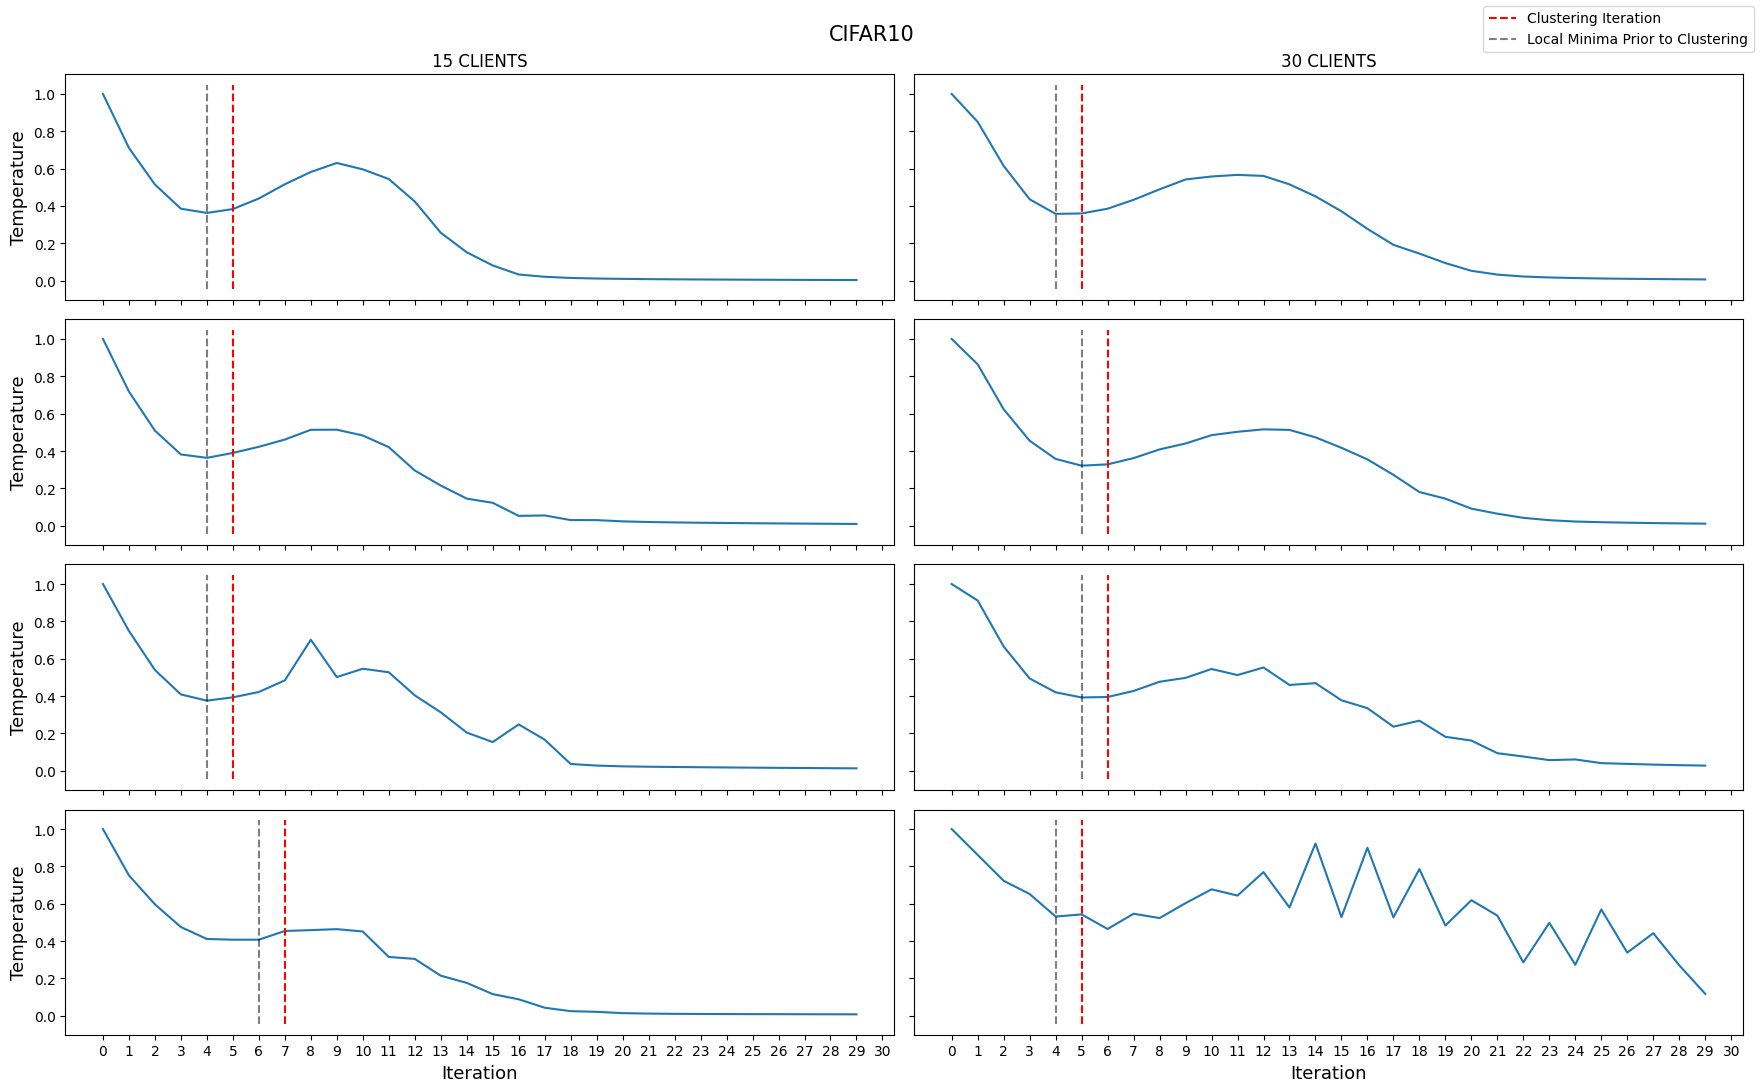

In [44]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO, sharey=True, sharex=True)
round_cutoff = 30

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature_normalized['CIFAR10_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature_normalized['CIFAR10_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature_normalized['CIFAR10_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature_normalized['CIFAR10_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature_normalized['CIFAR10_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature_normalized['CIFAR10_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature_normalized['CIFAR10_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature_normalized['CIFAR10_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[0][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][0].vlines(x=7, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=6, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[0][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[1][1].vlines(x=6, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][1].vlines(x=6, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[3][0].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
axes[3][1].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
for a in range(4):
    axes[a][0].set_ylabel('Temperature', fontsize=Y_LABEL_FONT)
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("CIFAR10", fontsize=TITLE_FONT)
fig.legend(fontsize=ANOT_FONT)
fig.tight_layout()

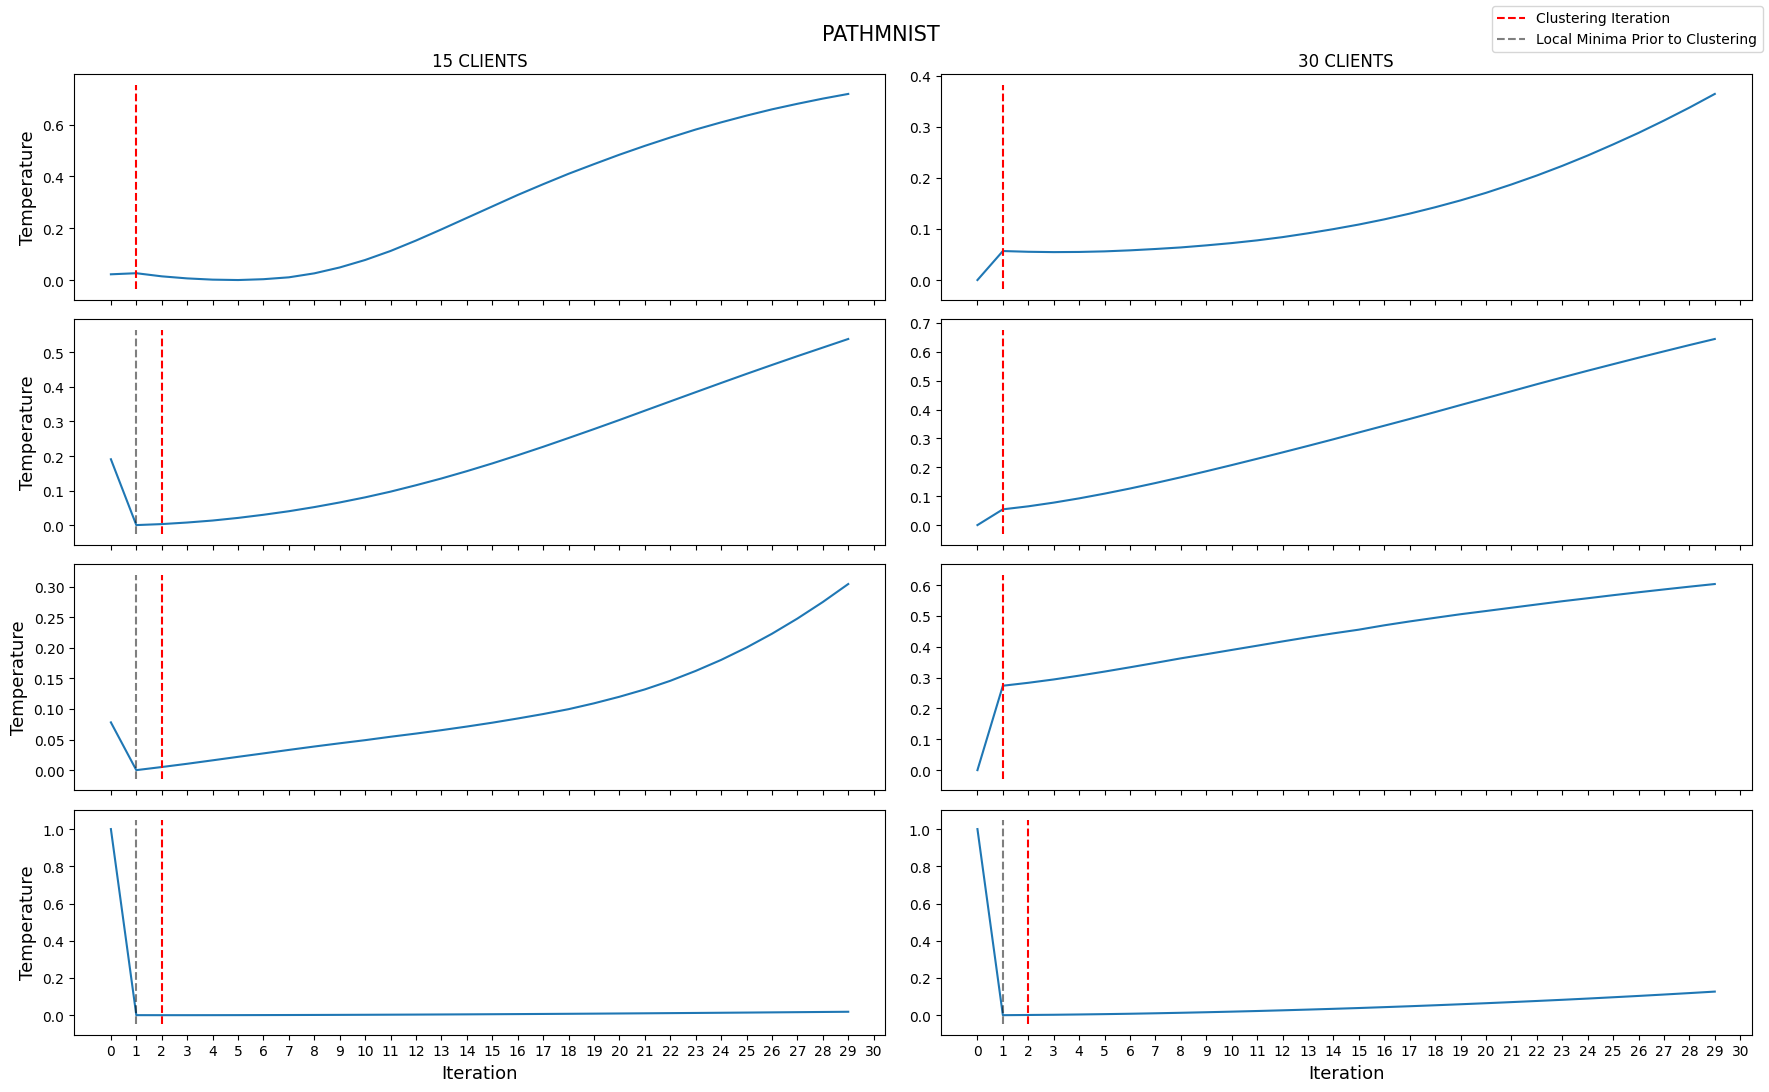

In [46]:
fig, axes = plt.subplots(4, 2, figsize=GENERAL_RATIO, sharey=False, sharex=True)
round_cutoff = 30

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature_normalized['PATHMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature_normalized['PATHMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature_normalized['PATHMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature_normalized['PATHMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature_normalized['PATHMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature_normalized['PATHMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature_normalized['PATHMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature_normalized['PATHMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = axes[0][0].get_ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')

ymin, ymax = axes[1][0].get_ylim()
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')

ymin, ymax = axes[2][0].get_ylim()
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[3][0].get_ylim()
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[0][1].get_ylim()
axes[0][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[1][1].get_ylim()
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[2][1].get_ylim()
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[3][1].get_ylim()
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[3][0].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
axes[3][1].set_xlabel('Iteration', fontsize=X_LABEL_FONT)
for a in range(4):
    axes[a][0].set_ylabel('Temperature', fontsize=Y_LABEL_FONT)
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("PATHMNIST", fontsize=TITLE_FONT)
fig.legend(fontsize=ANOT_FONT)
fig.tight_layout()